In [21]:
#load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
# Load final results and relevant price data
strategy_results = pd.read_csv("/Users/diogomeisser/Desktop/quant-momentum-strategy/DATA/strategy_results_sharpe_based_final.csv")
adj_close = pd.read_csv("/Users/diogomeisser/Desktop/quant-momentum-strategy/DATA/ETF_ADJ_close_returns.csv", index_col=0, parse_dates=True)
log_returns = pd.read_csv("/Users/diogomeisser/Desktop/quant-momentum-strategy/DATA/ETF_log_returns.csv", index_col=0, parse_dates=True)


In [23]:
# Summary stats grouped by ETF

# Group by ETF and compute mean of relevant stats
summary_table = strategy_results.groupby("ETF")[["Sharpe", "Strategy Return", "Trade Count"]].mean()

# Add annualized Sharpe ratio
summary_table["Sharpe (Annualized)"] = summary_table["Sharpe"] * np.sqrt(252)

# Round results
summary_table = summary_table.round(4)

print(summary_table)



     Sharpe  Strategy Return  Trade Count  Sharpe (Annualized)
ETF                                                           
DIA  0.0247           0.0906       6.2273               0.3926
QQQ  0.0246           0.1526       6.4091               0.3900
SPY  0.0397           0.1641       3.7273               0.6295


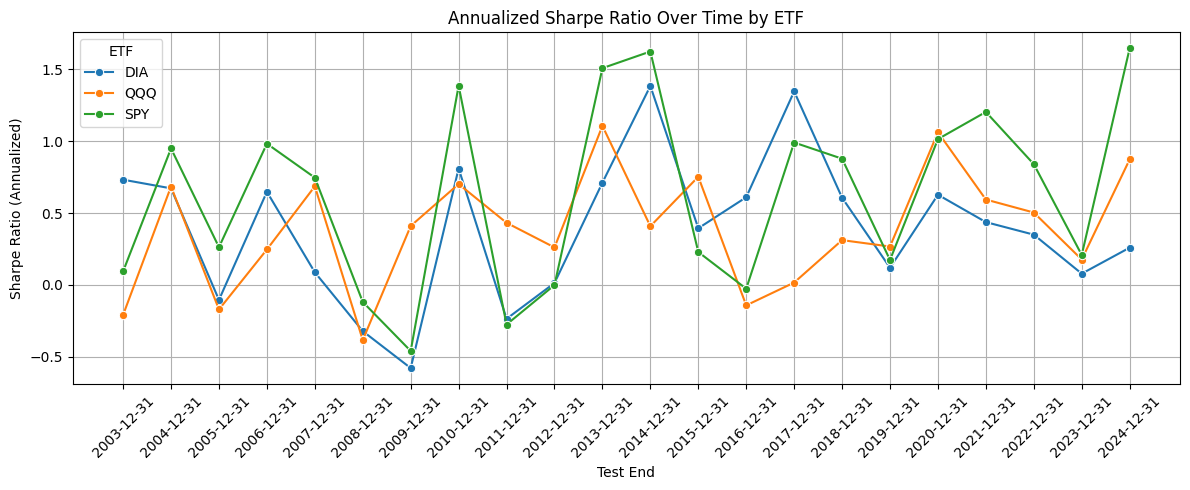

Based on the past 2 years of daily data, here’s what the annualized Sharpe ratio looks like.


In [29]:
#sharpe ratio over time
# Make sure Sharpe is annualized
strategy_results["Sharpe_Annualized"] = strategy_results["Sharpe"] * np.sqrt(252)

# Plot annualized Sharpe over time
plt.figure(figsize=(12, 5))
sns.lineplot(data=strategy_results, x="Test End", y="Sharpe_Annualized", hue="ETF", marker="o")
plt.title("Annualized Sharpe Ratio Over Time by ETF")
plt.ylabel("Sharpe Ratio (Annualized)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print('Based on the past 2 years of daily data, here’s what the annualized Sharpe ratio looks like.')

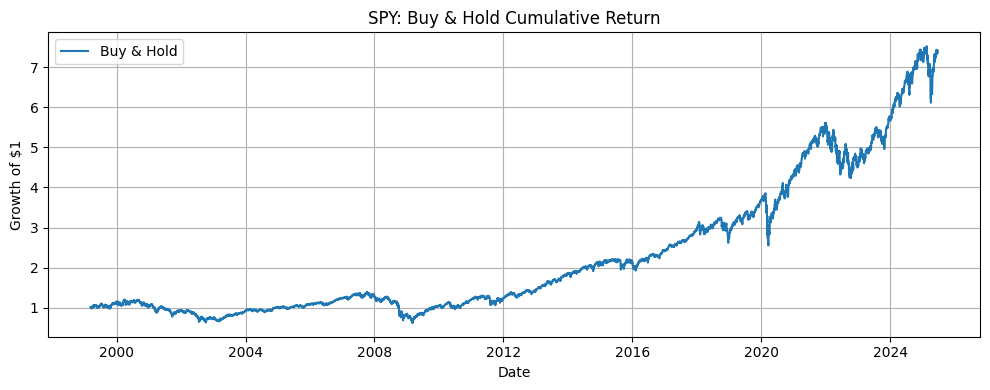

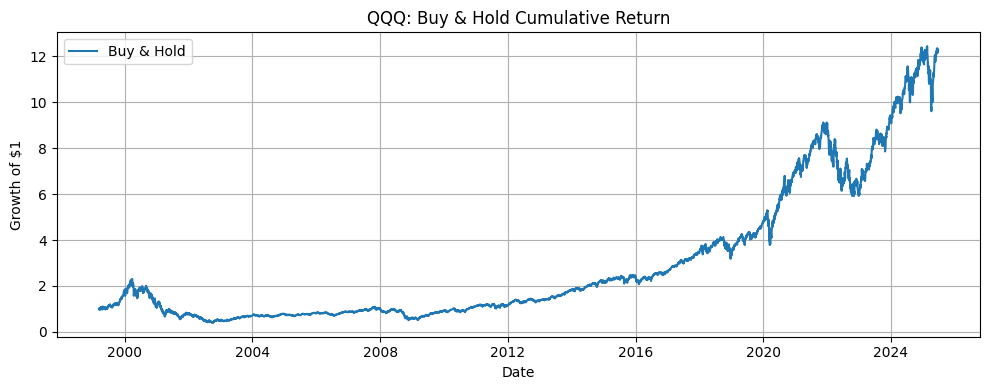

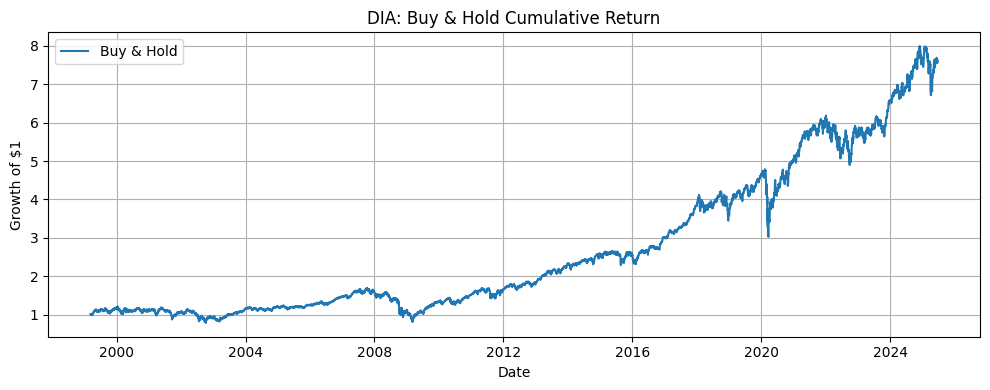

In [25]:
#buy and hold benchmark
# Create cumulative returns from log returns (Buy & Hold benchmark)
cumulative_returns = {}

for etf in log_returns.columns:
    cumulative_returns[f"{etf}_buy_hold"] = np.exp(log_returns[etf].cumsum())

# Join into a single DataFrame
cumulative_df = pd.DataFrame(cumulative_returns)

# Plot for each ETF
for etf in ["SPY", "QQQ", "DIA"]:
    plt.figure(figsize=(10, 4))
    plt.plot(cumulative_df.index, cumulative_df[f"{etf}_buy_hold"], label="Buy & Hold")
    plt.title(f"{etf}: Buy & Hold Cumulative Return")
    plt.ylabel("Growth of $1")
    plt.xlabel("Date")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



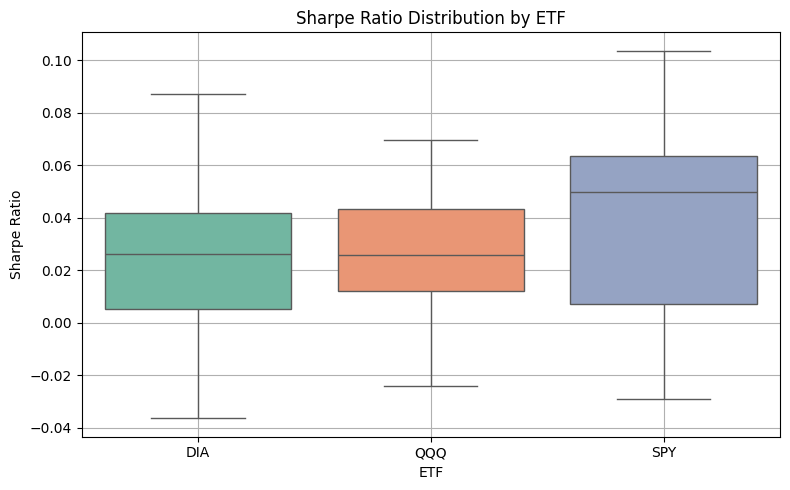

In [30]:
#boxplot of sharpe ratio
plt.figure(figsize=(8, 5))
sns.boxplot(data=strategy_results, x="ETF", y="Sharpe", hue="ETF", palette="Set2", legend=False)
plt.title("Sharpe Ratio Distribution by ETF")
plt.xlabel("ETF")
plt.ylabel("Sharpe Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()

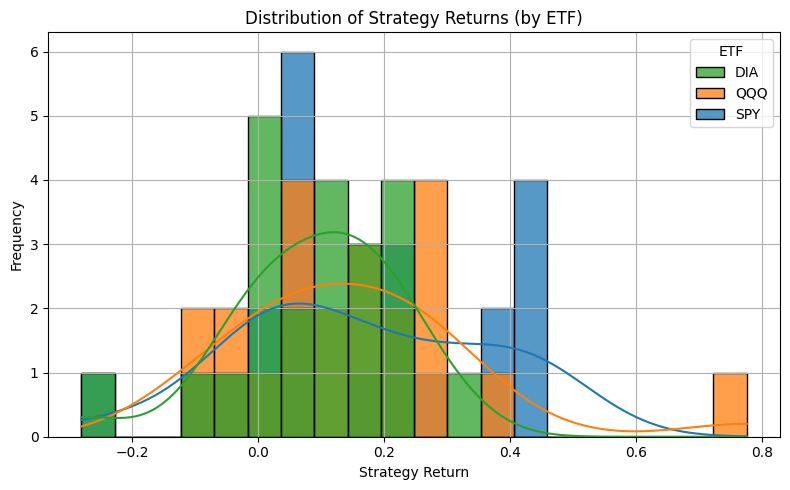

In [35]:
#histogram of strategy returns by ETF
custom_colors = {
    "SPY": "#1f77b4",  # Blue
    "QQQ": "#ff7f0e",  # Orange
    "DIA": "#2ca02c"   # Green
}

plt.figure(figsize=(8, 5))
sns.histplot(
    data=strategy_results,
    x="Strategy Return",
    hue="ETF",
    kde=True,
    bins=20,
    alpha=0.75,
    palette=custom_colors
)
plt.title("Distribution of Strategy Returns (by ETF)")
plt.xlabel("Strategy Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()